<a href="https://colab.research.google.com/github/NathanaelMutua/British-Airways-Data-Science-Challenge/blob/master/Task%202%20British%20Airways%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **British Airways Data Science Challenge**
# **Task 2**

## **Summary:**
### **1.Explore and Prepare the Dataset:**

Use the provided Jupyter Notebook to understand the dataset’s columns and statistics.
Clean and engineer new features that may improve predictive performance.

### **2.Train a Machine Learning Model:**

Build a predictive model to determine if a customer will make a booking.
Use an algorithm (e.g., Random Forest) that provides insights into the importance of each feature.

### **3.Evaluate and Present Findings:**

Assess model performance with cross-validation.
Report relevant metrics to demonstrate how well the model predicts bookings.

# **Data Exploration and Preperation**
Involves examining a dataset’s structure, patterns, and basic statistics to understand its variables, spot any anomalies or missing values, and uncover potential relationships.
This process often includes summary statistics, visualizations, and initial feature assessments to guide subsequent data cleaning and modeling decisions.

In [55]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [56]:
# Let's first load our data into a dataframe(bookings)
from google.colab import drive

# I saved my file in my drive, so I will draw the file from my Drive
drive.mount('/content/drive')
csv_file = '/content/drive/My Drive/BRITISH AIRWAYS VIRTUAL INTERNSHIP/customer_booking.csv'
bookings = pd.read_csv(csv_file, encoding = "ISO-8859-1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# Let's see the shape(rows and columns; rows,columns) in our dataframe
bookings.shape

(50000, 14)

In [58]:
# Let's see the 14 columns in our dataset.
for col in bookings.columns:
    print(col) # Let's us loop through the columns

num_passengers
sales_channel
trip_type
purchase_lead
length_of_stay
flight_hour
flight_day
route
booking_origin
wants_extra_baggage
wants_preferred_seat
wants_in_flight_meals
flight_duration
booking_complete


In [59]:
# Let's check the datatypes for each column
bookings.dtypes

,0
num_passengers,int64
sales_channel,object
trip_type,object
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,object
route,object
booking_origin,object
wants_extra_baggage,int64


In [60]:
# .info() gives us a detailed brakdown, showing us the column name, null count and datatype of the column.
print(bookings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [61]:
# Let's see what the columns contain
bookings.head(6)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0


In [62]:
# Let's see the outcomes for the bookings
bookings.booking_complete.value_counts()

,count
booking_complete,
0,42522
1,7478


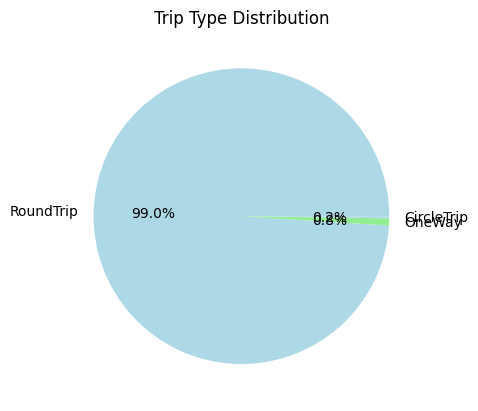

In [63]:
# Just for a brief preview let's visualize our trip type data
import matplotlib.pyplot as plt

bookings["trip_type"].value_counts().plot.pie(autopct='%1.1f%%', colors=["lightblue", "lightgreen"])
plt.title("Trip Type Distribution")
plt.ylabel("")
plt.show()

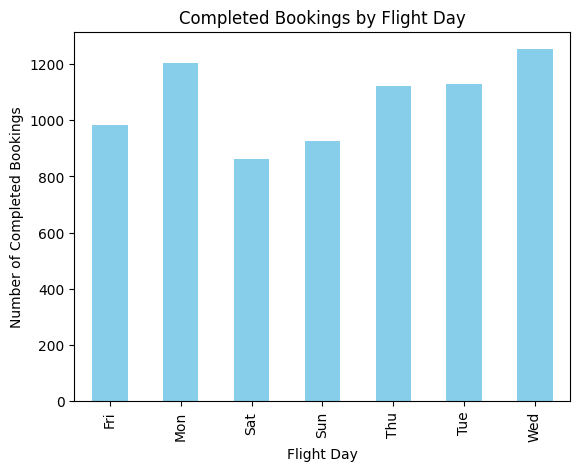

In [64]:
# Brief visualization of our complete bookings on different days of the week
booking_counts = bookings.groupby('flight_day')['booking_complete'].sum()

booking_counts.plot(kind='bar', color='skyblue')
plt.title('Completed Bookings by Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Number of Completed Bookings')
plt.show()

### **Feature Importance with Mutual Information Score**


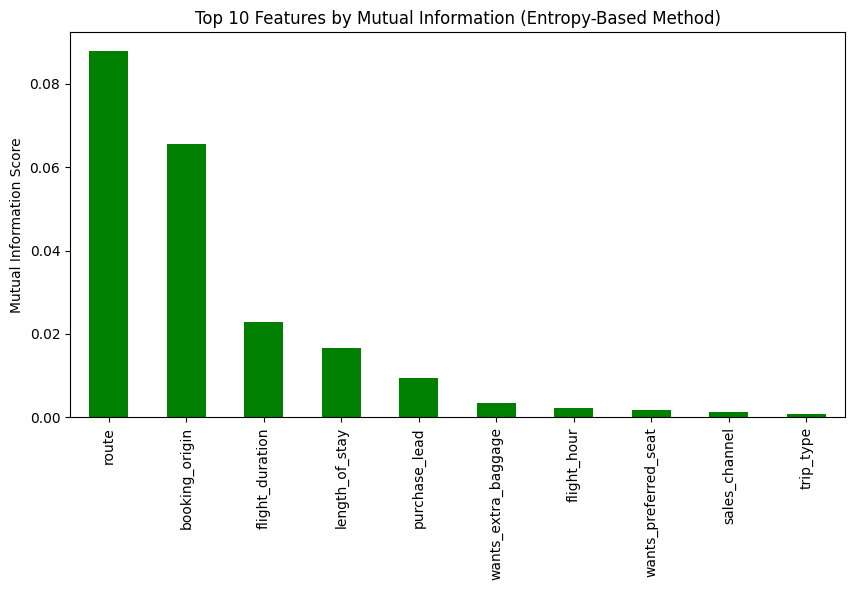

In [69]:
from scipy.stats import entropy

# Compute entropy of target variable
target_entropy = entropy(y.value_counts(normalize=True), base=2)

# Compute conditional entropy of each feature
mi_scores = {}
for col in X.columns:
    feature_entropy = entropy(X[col].value_counts(normalize=True), base=2)
    joint_entropy = entropy(pd.crosstab(X[col], y, normalize=True).values.flatten(), base=2)
    mi_scores[col] = target_entropy + feature_entropy - joint_entropy

# Convert to Pandas Series and sort
mi_scores = pd.Series(mi_scores).sort_values(ascending=False)

# Plot top 10 features
mi_scores[:10].plot(kind="bar", figsize=(10, 5), color="green")
plt.title("Top 10 Features by Mutual Information (Entropy-Based Method)")
plt.ylabel("Mutual Information Score")
plt.show()


## **Correlation Matrix**

✔ This gives a table of correlation values between all numerical features.

✔ Values range from -1 to 1:

1.0 → Perfect positive correlation

-1.0 → Perfect negative correlation

0 → No correlation

In [70]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = X.select_dtypes(include=["int64", "float64"]).corr()

# Display correlation matrix
print(corr_matrix)

                       num_passengers  purchase_lead  length_of_stay  \
num_passengers               1.000000       0.212606       -0.115850   
purchase_lead                0.212606       1.000000       -0.076560   
length_of_stay              -0.115850      -0.076560        1.000000   
flight_hour                  0.015607       0.035973       -0.024872   
wants_extra_baggage          0.120404      -0.022207        0.176757   
wants_preferred_seat         0.028544      -0.004499        0.032264   
wants_in_flight_meals        0.022943      -0.022653        0.098828   
flight_duration             -0.063169       0.067866        0.141181   

                       flight_hour  wants_extra_baggage  wants_preferred_seat  \
num_passengers            0.015607             0.120404              0.028544   
purchase_lead             0.035973            -0.022207             -0.004499   
length_of_stay           -0.024872             0.176757              0.032264   
flight_hour               1

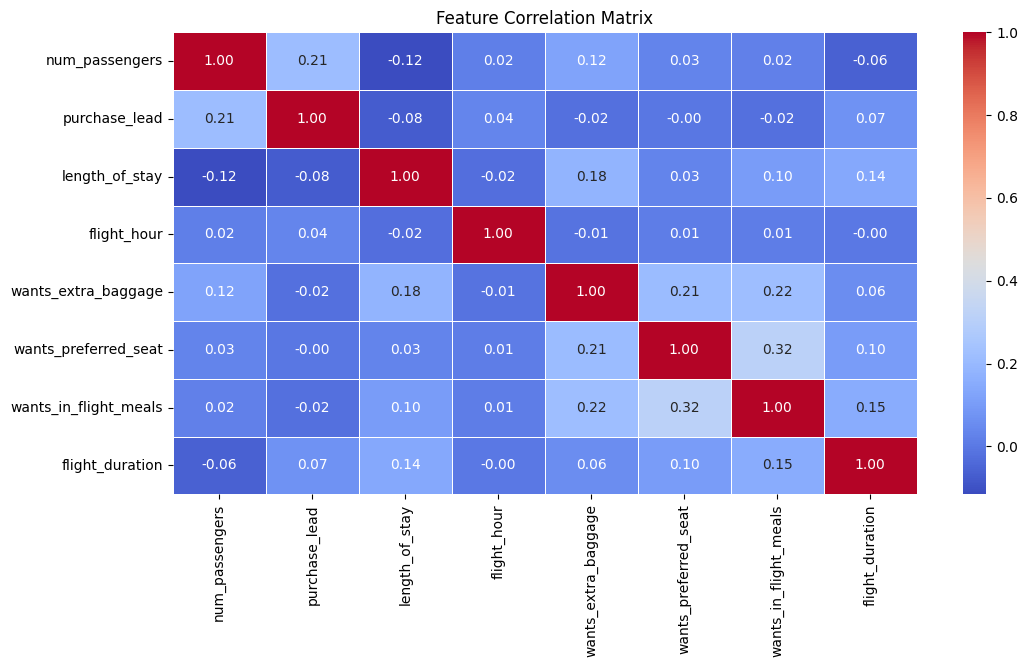

In [71]:
# Visualising correlation with a heatmap

# Red = High correlation
# Blue = Low correlation
# Helps visually detect highly correlated features

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Identify highly correlated features

In [74]:
# Set a correlation threshold (e.g., 0.8)
threshold = 0.3

# Find pairs of highly correlated features
high_corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=True)

# Remove self-correlations (correlation of a feature with itself)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]

# Display highly correlated feature pairs
print(high_corr_pairs[high_corr_pairs > threshold])

wants_preferred_seat   wants_in_flight_meals    0.315088
wants_in_flight_meals  wants_preferred_seat     0.315088
dtype: float64


In [ ]:
# Categorical data to numerical form
# trip_type and flight_day are ordinal data - has order
# Sales channel, Route and Booking_origin are nominal data - no order
categorical_cols = bookings.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# I have manually categorised the categorical data, as follows:
ordinal_data = ["flight_day", "trip_type"]
nominal_data = ["sales_channel", "route", "booking_origin"]

# Let's apply encoding(Hot-one) on our nominal data
bookings = pd.get_dummies(bookings, columns = nominal_data, drop_first = True)

# And Label encoding on our ordinal data
label_encoded_data = LabelEncoder()
for col in ordinal_data:
    bookings[col] = label_encoded_data.fit_transform(bookings[col])


In [ ]:
# Let's see the outcome of our encoding:
bookings.head()

## **Feature Importance With Trained Rain Forest**


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Ensureing the x and y features are defined
y = bookings["booking_complete"]  # Here's our target column
X = bookings.drop(columns=["booking_complete"])  # Dropping the target column from feature set

# Compute MI scores
mi_scores = mutual_info_classif(X, y, discrete_features= "auto")

# Convert to a Pandas Series for easy visualization
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot top 10 features by MI score
import matplotlib.pyplot as plt
mi_scores[:10].plot(kind="bar", figsize=(10, 5), color="orange")
plt.title("Top 10 Features by Mutual Information Score")
plt.ylabel("Mutual Information Score")
plt.show()